In [1]:
import multitensor

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize

In [4]:
%matplotlib notebook

In [53]:
def normalize_membership(u):
    row_sum = u.sum(axis=1)
    u_norm = np.copy(u)
    u_norm[row_sum>0] = u_norm[row_sum>0]/row_sum[row_sum>0,np.newaxis]
    return u_norm

In [85]:
def binary_assignement_communities(u,threshold=0.1):
    u_norm = normalize_membership(u)
    return [np.where(u_norm[i]>threshold)[0] for i in range(u.shape[0])]
    

In [39]:
def _add_centered_square(ax, xy, area, **kwargs):
    size = 0.7*np.sqrt(area)
    loc = np.asarray(xy) - size/2.
    rect = mpatches.Rectangle(loc, size, size, **kwargs)
    ax.add_patch(rect)

def hinton(a, ax=None,index_shift = None,rotation=False,cmapC='Greys'):
    """
    Draw a Hinton diagram for the 2D array `a` on the axes.
    Elements of `a` should range between -1 and 1. Each element will
    be represented by a square which is white for positive values, or
    black for negative values, with an area proportional to its
    magnitude.
    The diagram will be drawn on the current axes, or the one
    specified by `ax`. It will look best for axes whose aspect ratio
    matches that of the matrix being diagrammed.
    """
    cmap = plt.get_cmap(cmapC)
    if ax is None:
        ax = plt.gca()
    ax.patch.set_facecolor('w')
    for xy, val in np.ndenumerate(a):
        if index_shift is not None:
            xy_idx = (index_shift+xy[0],xy[1])
        else: 
            xy_idx = xy
            
        norm = Normalize(vmin=0, vmax=1 )
        color = cmap(norm(val))

        if rotation == False: xyr = xy_idx
        else: xyr = (xy_idx[1],xy_idx[0])

        _add_centered_square(ax, np.asarray(xyr) + (0,+0),abs(val), color=color)
    ax.autoscale_view()



Run `python` version

In [67]:
adjacency_file = '../data/main/adjacency.dat'
num_groups = 2

u, v, affinity, report = multitensor.run(adjacency_file, num_groups,seed=10,nof_realizations=10)
u = u[:,1:] # first column is the node name
v = v[:,1:]

In [68]:
u_norm = normalize_membership(u)
u_norm.shape

(300, 2)

Import `cpp` results.

First run from the main folder in a terminal window:
```bash
./Multitensor --s 10 --r 10 --a ../data/main/adjacency.dat --k 2
```

In [56]:
u_cpp = pd.read_csv('./results/u_out.dat',skiprows=1,sep='\s+',header=None).values[:,1:]

u_norm_cpp = normalize_membership(u)
u_norm_cpp.shape

(300, 2)

Plot membership

<IPython.core.display.Javascript object>


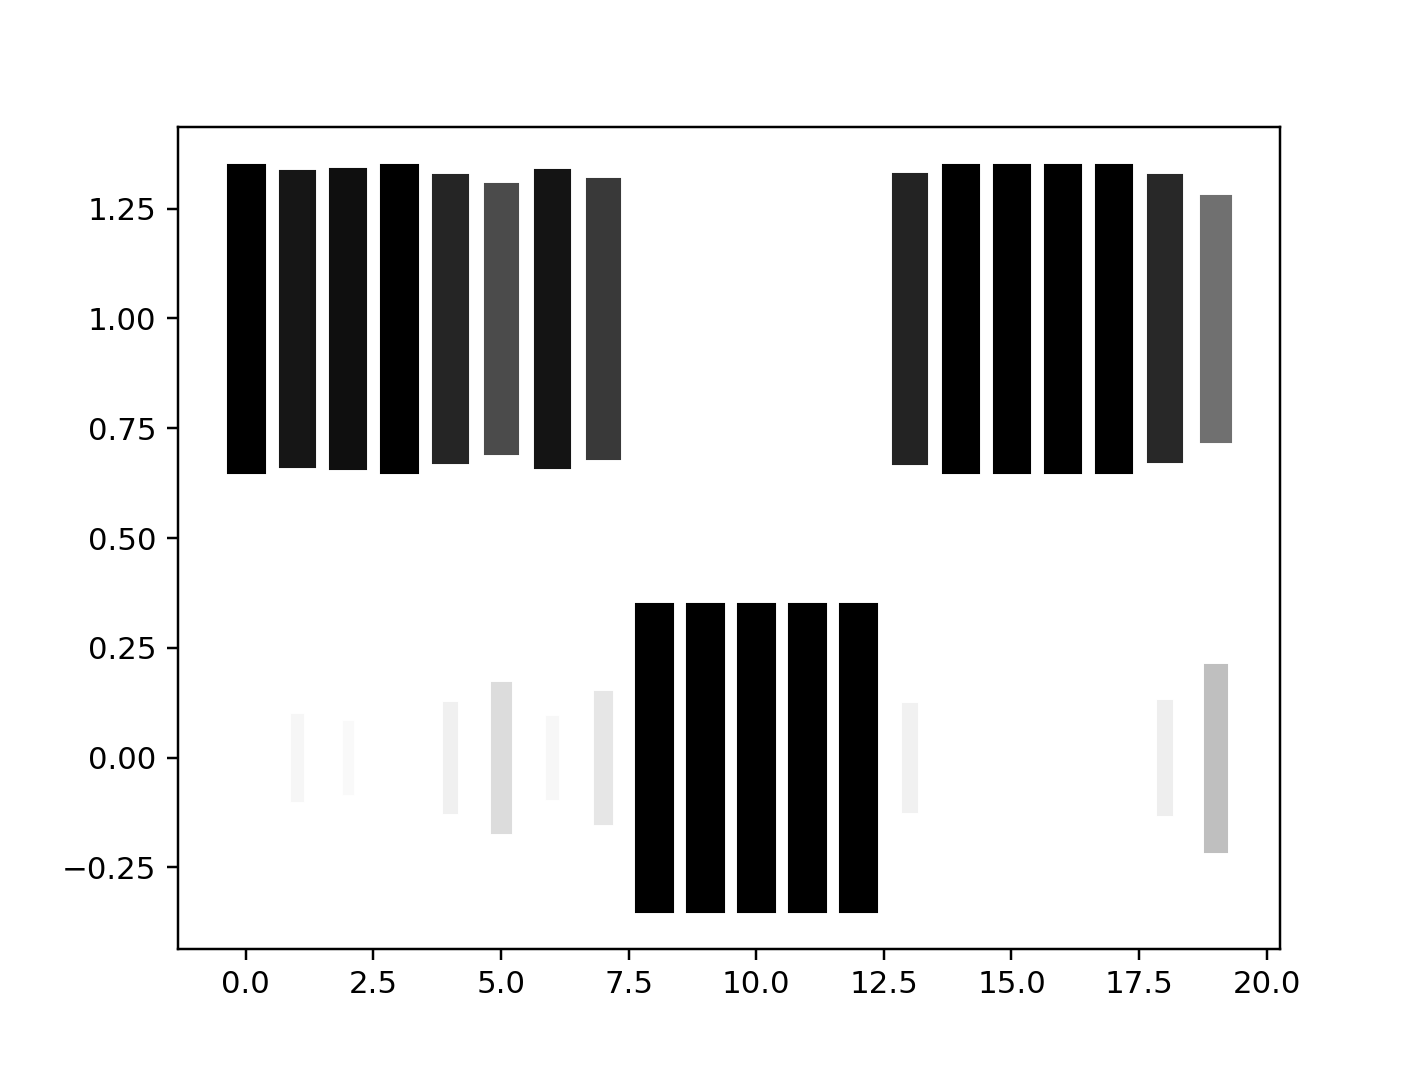

In [59]:
plt.figure()
hinton(u_norm[:20],index_shift = 0,rotation=False)

<IPython.core.display.Javascript object>


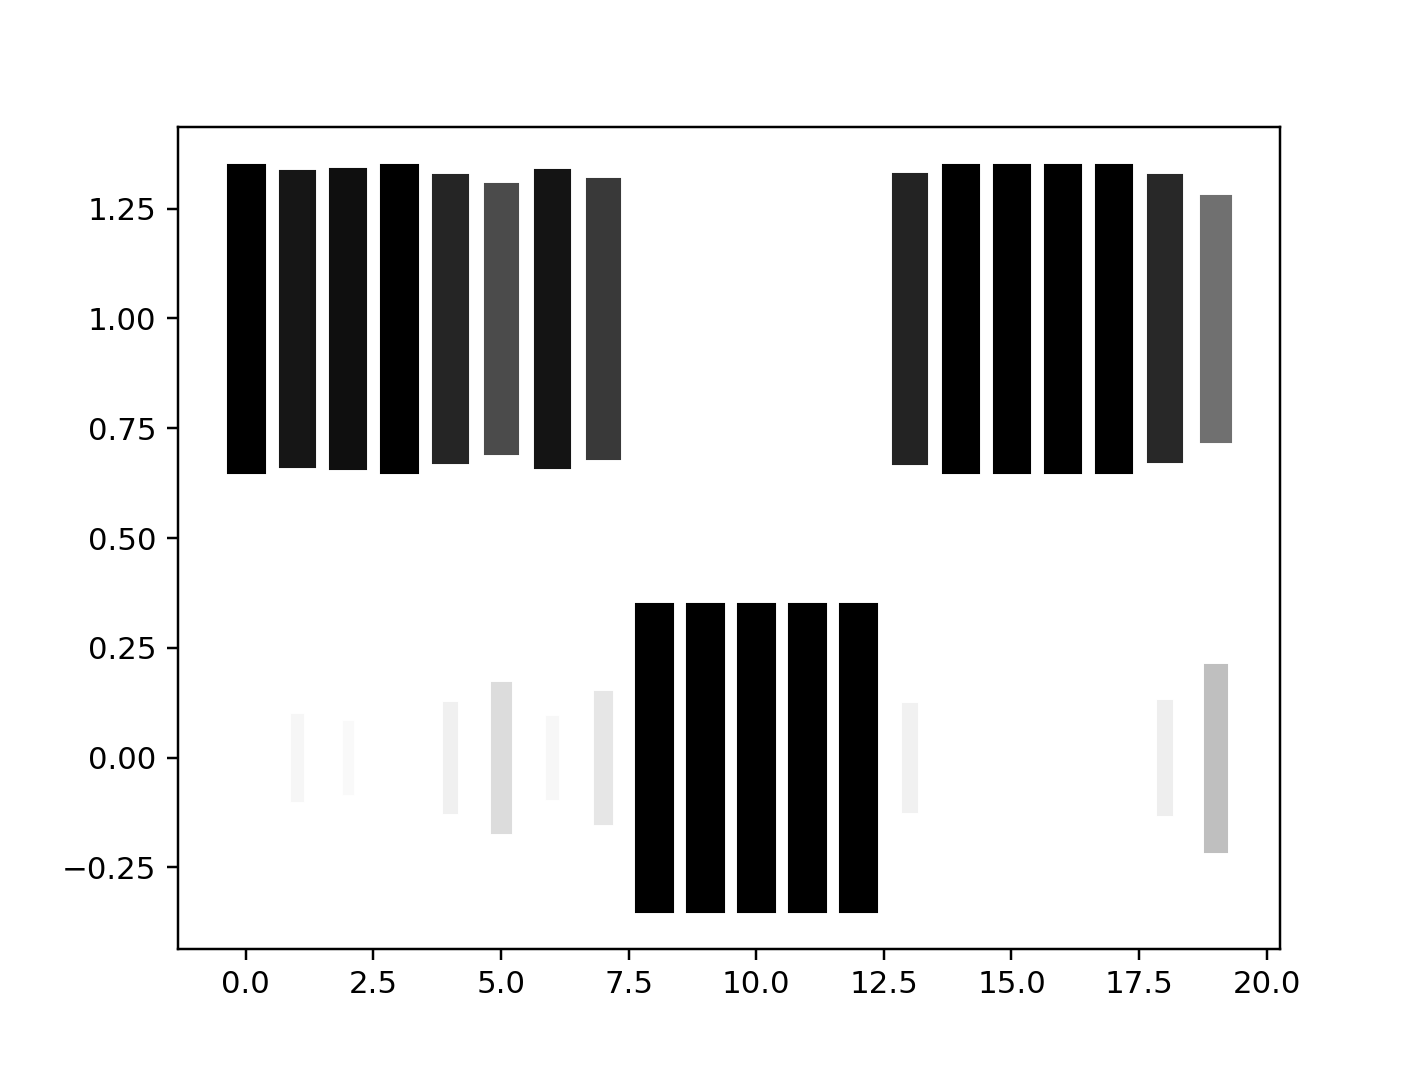

In [60]:
plt.figure()
hinton(u_norm_cpp[:20],index_shift = 0,rotation=False)

In [82]:
cm = binary_assignement_communities(u,threshold=0.1)

In [ ]:
cm